# The purpose of this code is review types of dimension reductions in Logistic regresion algorithms.

In [1]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import decimal


In [2]:
df = pd.read_csv("human-activity-recognition-with-smartphones.csv")

In [3]:
print(f"Dataframe shape : {df.shape}")

Dataframe shape : (7352, 563)


In [4]:
df.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [5]:
list_of_activity = df["Activity"].unique().tolist() 
print(list_of_activity)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [6]:
X = df.drop(columns = "Activity")
print(X.shape)

(7352, 562)


In [7]:
y = df["Activity"]
print(y.shape)

(7352,)


In [8]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [9]:
LR_classifer = LogisticRegression(random_state=0,max_iter=10)

In [10]:
fitted_LR = LR_classifer.fit(X_train, y_train)

/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
y_predicted = fitted_LR.predict(X_test)

In [12]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.8463630183548606


# Feature selection

**Select K best**

f_classif

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [14]:
feature_selection_SelectKBest_100 = SelectKBest(f_classif, k=100)

In [15]:
X_feature_selection_f_classif_100 = feature_selection_SelectKBest_100.fit_transform(X, y)
X_feature_selection_f_classif_100.shape

(7352, 100)

In [16]:
X_train_f_classif_100, X_test_f_classif_100,y_train_f_classif_100, y_test_f_classif_100 = train_test_split(X_feature_selection_f_classif_100,y, test_size=0.2)

In [17]:
print(f"X_train_f_classif_100: {X_train_f_classif_100.shape}")
print(f"X_test_f_classif_100: {X_test_f_classif_100.shape}")
print(f"y_train_f_classif_100: {y_train_f_classif_100.shape}")
print(f"y_test_f_classif_100: {y_test_f_classif_100.shape}")

X_train_f_classif_100: (5881, 100)
X_test_f_classif_100: (1471, 100)
y_train_f_classif_100: (5881,)
y_test_f_classif_100: (1471,)


In [18]:
fitted_LR_f_classif_100 = LR_classifer.fit(X_train_f_classif_100, y_train_f_classif_100)

/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
y_predicted_f_classif_100 = fitted_LR_f_classif_100.predict(X_test_f_classif_100)

In [20]:
    y_predicted_f_classif_100

array(['WALKING', 'WALKING', 'LAYING', ..., 'LAYING', 'WALKING_UPSTAIRS',
       'STANDING'], dtype=object)

In [21]:
accuracy_prediction_f_classif_100 = accuracy_score(y_test_f_classif_100, y_predicted_f_classif_100)
print(f"accuracy_f_classif_100: {accuracy_prediction_f_classif_100}")

accuracy_f_classif_100: 0.760707002039429


In [22]:
    feature_selection_SelectKBest_200 = SelectKBest(f_classif, k=200)
    X_feature_selection_f_classif_200 = feature_selection_SelectKBest_200.fit_transform(X, y)
    X_feature_selection_f_classif_200.shape
    X_train_f_classif_200, X_test_f_classif_200,y_train_f_classif_200, y_test_f_classif_200 = train_test_split(X_feature_selection_f_classif_200,y, test_size=0.2)
    print(f"X_train_f_classif_200: {X_train_f_classif_200.shape}")
    print(f"X_test_f_classif_200: {X_test_f_classif_200.shape}")
    print(f"y_train_f_classif_200: {y_train_f_classif_200.shape}")
    print(f"y_test_f_classif_200: {y_test_f_classif_200.shape}")
    fitted_LR_f_classif_200 = LR_classifer.fit(X_train_f_classif_200, y_train_f_classif_200)
    y_predicted_f_classif_200 = fitted_LR_f_classif_200.predict(X_test_f_classif_200)
    accuracy_prediction_f_classif_200 = accuracy_score(y_test_f_classif_200, y_predicted_f_classif_200)
    print(f"accuracy_f_classif_200: {accuracy_prediction_f_classif_200}")

X_train_f_classif_200: (5881, 200)
X_test_f_classif_200: (1471, 200)
y_train_f_classif_200: (5881,)
y_test_f_classif_200: (1471,)
accuracy_f_classif_200: 0.8354860639021074


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
feature_selection_SelectKBest_300 = SelectKBest(f_classif, k=300)
X_feature_selection_f_classif_300 = feature_selection_SelectKBest_300.fit_transform(X, y)
X_feature_selection_f_classif_300.shape
X_train_f_classif_300, X_test_f_classif_300,y_train_f_classif_300, y_test_f_classif_300 = train_test_split(X_feature_selection_f_classif_300,y, test_size=0.2)
print(f"X_train_f_classif_300: {X_train_f_classif_300.shape}")
print(f"X_test_f_classif_300: {X_test_f_classif_300.shape}")
print(f"y_train_f_classif_300: {y_train_f_classif_300.shape}")
print(f"y_test_f_classif_300: {y_test_f_classif_300.shape}")
fitted_LR_f_classif_300 = LR_classifer.fit(X_train_f_classif_300, y_train_f_classif_300)
y_predicted_f_classif_300 = fitted_LR_f_classif_300.predict(X_test_f_classif_300)
accuracy_prediction_f_classif_300 = accuracy_score(y_test_f_classif_300, y_predicted_f_classif_300)
print(f"accuracy_f_classif_300: {accuracy_prediction_f_classif_300}")

X_train_f_classif_300: (5881, 300)
X_test_f_classif_300: (1471, 300)
y_train_f_classif_300: (5881,)
y_test_f_classif_300: (1471,)
accuracy_f_classif_300: 0.8708361658735554


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
feature_selection_SelectKBest_400 = SelectKBest(f_classif, k=400)
X_feature_selection_f_classif_400 = feature_selection_SelectKBest_400.fit_transform(X, y)
X_feature_selection_f_classif_400.shape
X_train_f_classif_400, X_test_f_classif_400,y_train_f_classif_400, y_test_f_classif_400 = train_test_split(X_feature_selection_f_classif_400,y, test_size=0.2)
print(f"X_train_f_classif_400: {X_train_f_classif_400.shape}")
print(f"X_test_f_classif_400: {X_test_f_classif_400.shape}")
print(f"y_train_f_classif_400: {y_train_f_classif_400.shape}")
print(f"y_test_f_classif_400: {y_test_f_classif_400.shape}")
fitted_LR_f_classif_400 = LR_classifer.fit(X_train_f_classif_400, y_train_f_classif_400)
y_predicted_f_classif_400 = fitted_LR_f_classif_400.predict(X_test_f_classif_400)
accuracy_prediction_f_classif_400 = accuracy_score(y_test_f_classif_400, y_predicted_f_classif_400)
print(f"accuracy_f_classif_400: {accuracy_prediction_f_classif_400}")

X_train_f_classif_400: (5881, 400)
X_test_f_classif_400: (1471, 400)
y_train_f_classif_400: (5881,)
y_test_f_classif_400: (1471,)
accuracy_f_classif_400: 0.8259687287559483


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


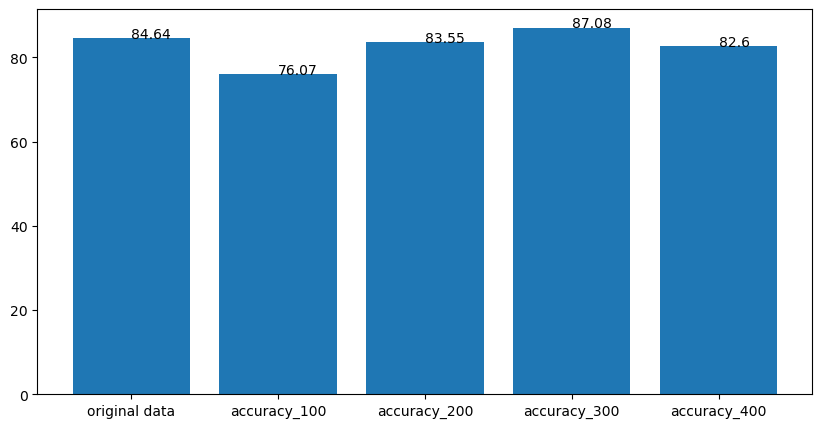

In [25]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

chi2

In [26]:
from sklearn.feature_selection import chi2

> solution: MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
X_max_min = pd.DataFrame(scaled, columns=X.columns)
X_max_min

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.644292,0.489853,0.433547,0.002361,0.008748,0.043237,0.002444,0.008546,0.038236,0.032638,...,0.350991,0.147940,0.437030,0.515200,0.267793,0.491741,0.079377,0.798251,0.470687,0.0
1,0.639209,0.491795,0.438240,0.000877,0.012824,0.019839,0.000596,0.012749,0.021157,0.028466,...,0.201676,0.070666,0.521131,0.496283,0.133774,0.853429,0.077606,0.798487,0.472842,0.0
2,0.639827,0.490266,0.443269,0.002310,0.017058,0.010528,0.001740,0.018464,0.011266,0.030654,...,0.304605,0.122488,0.434094,0.588950,0.550707,0.906041,0.075533,0.798722,0.475441,0.0
3,0.639587,0.486900,0.438359,0.001954,0.008596,0.004662,0.001450,0.008767,0.005349,0.030654,...,0.442374,0.264192,0.475464,0.493554,0.820538,0.257822,0.075675,0.799600,0.476168,0.0
4,0.638314,0.491715,0.442319,0.000931,0.009945,0.004759,0.000839,0.010331,0.004779,0.028765,...,0.324393,0.153612,0.556466,0.561271,0.847339,0.192392,0.076067,0.801776,0.478054,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.649833,0.471403,0.409383,0.402307,0.542650,0.538539,0.358850,0.530383,0.530205,0.605398,...,0.205011,0.061044,0.397729,0.914859,0.603878,0.287755,0.104058,0.837938,0.524910,1.0
7348,0.636926,0.496125,0.426266,0.382346,0.524338,0.529640,0.338724,0.493247,0.540293,0.558720,...,0.304610,0.163047,0.526914,0.937840,0.060523,0.701485,0.114080,0.847458,0.525026,1.0
7349,0.636694,0.491495,0.477489,0.390891,0.467640,0.637266,0.347742,0.457948,0.666292,0.521999,...,0.514134,0.355582,0.520791,0.366638,0.932807,0.852256,0.110434,0.845069,0.520406,1.0
7350,0.644827,0.490578,0.420860,0.390430,0.463679,0.634447,0.344756,0.473556,0.659737,0.550851,...,0.533662,0.334993,0.442795,0.850370,0.968966,0.205664,0.107409,0.843234,0.512670,1.0


In [28]:
feature_selection_SelectKBest_100 = SelectKBest(chi2, k=100)
X_feature_selection_chi2_100 = feature_selection_SelectKBest_100.fit_transform(X_max_min, y)
X_feature_selection_chi2_100.shape
X_train_chi2_100, X_test_chi2_100,y_train_chi2_100, y_test_chi2_100 = train_test_split(X_feature_selection_chi2_100,y, test_size=0.2)
print(f"X_train_chi2_100: {X_train_chi2_100.shape}")
print(f"X_test_chi2_100: {X_test_chi2_100.shape}")
print(f"y_train_chi2_100: {y_train_chi2_100.shape}")
print(f"y_test_chi2_100: {y_test_chi2_100.shape}")
fitted_LR_chi2_100 = LR_classifer.fit(X_train_chi2_100, y_train_chi2_100)
y_predicted_chi2_100 = fitted_LR_chi2_100.predict(X_test_chi2_100)
accuracy_prediction_chi2_100 = accuracy_score(y_test_chi2_100, y_predicted_chi2_100)
print(f"accuracy_chi2_100: {accuracy_prediction_chi2_100}")

X_train_chi2_100: (5881, 100)
X_test_chi2_100: (1471, 100)
y_train_chi2_100: (5881,)
y_test_chi2_100: (1471,)
accuracy_chi2_100: 0.8123725356900068


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
feature_selection_SelectKBest_200 = SelectKBest(chi2, k=200)
X_feature_selection_chi2_200 = feature_selection_SelectKBest_200.fit_transform(X_max_min, y)
X_feature_selection_chi2_200.shape
X_train_chi2_200, X_test_chi2_200,y_train_chi2_200, y_test_chi2_200 = train_test_split(X_feature_selection_chi2_200,y, test_size=0.2)
print(f"X_train_chi2_200: {X_train_chi2_200.shape}")
print(f"X_test_chi2_200: {X_test_chi2_200.shape}")
print(f"y_train_chi2_200: {y_train_chi2_200.shape}")
print(f"y_test_chi2_200: {y_test_chi2_200.shape}")
fitted_LR_chi2_200 = LR_classifer.fit(X_train_chi2_200, y_train_chi2_200)
y_predicted_chi2_200 = fitted_LR_chi2_200.predict(X_test_chi2_200)
accuracy_prediction_chi2_200 = accuracy_score(y_test_chi2_200, y_predicted_chi2_200)
print(f"accuracy_chi2_200: {accuracy_prediction_chi2_200}")

X_train_chi2_200: (5881, 200)
X_test_chi2_200: (1471, 200)
y_train_chi2_200: (5881,)
y_test_chi2_200: (1471,)
accuracy_chi2_200: 0.8966689326988443


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
feature_selection_SelectKBest_300 = SelectKBest(chi2, k=300)
X_feature_selection_chi2_300 = feature_selection_SelectKBest_300.fit_transform(X_max_min, y)
X_feature_selection_chi2_300.shape
X_train_chi2_300, X_test_chi2_300,y_train_chi2_300, y_test_chi2_300 = train_test_split(X_feature_selection_chi2_300,y, test_size=0.2)
print(f"X_train_chi2_300: {X_train_chi2_300.shape}")
print(f"X_test_chi2_300: {X_test_chi2_300.shape}")
print(f"y_train_chi2_300: {y_train_chi2_300.shape}")
print(f"y_test_chi2_300: {y_test_chi2_300.shape}")
fitted_LR_chi2_300 = LR_classifer.fit(X_train_chi2_300, y_train_chi2_300)
y_predicted_chi2_300 = fitted_LR_chi2_300.predict(X_test_chi2_300)
accuracy_prediction_chi2_300 = accuracy_score(y_test_chi2_300, y_predicted_chi2_300)
print(f"accuracy_chi2_300: {accuracy_prediction_chi2_300}")

X_train_chi2_300: (5881, 300)
X_test_chi2_300: (1471, 300)
y_train_chi2_300: (5881,)
y_test_chi2_300: (1471,)
accuracy_chi2_300: 0.9061862678450034


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
feature_selection_SelectKBest_400 = SelectKBest(chi2, k=400)
X_feature_selection_chi2_400 = feature_selection_SelectKBest_400.fit_transform(X_max_min, y)
X_feature_selection_chi2_400.shape
X_train_chi2_400, X_test_chi2_400,y_train_chi2_400, y_test_chi2_400 = train_test_split(X_feature_selection_chi2_400,y, test_size=0.2)
print(f"X_train_chi2_400: {X_train_chi2_400.shape}")
print(f"X_test_chi2_400: {X_test_chi2_400.shape}")
print(f"y_train_chi2_400: {y_train_chi2_400.shape}")
print(f"y_test_chi2_400: {y_test_chi2_400.shape}")
fitted_LR_chi2_400 = LR_classifer.fit(X_train_chi2_400, y_train_chi2_400)
y_predicted_chi2_400 = fitted_LR_chi2_400.predict(X_test_chi2_400)
accuracy_prediction_chi2_400 = accuracy_score(y_test_chi2_400, y_predicted_chi2_400)
print(f"accuracy_chi2_400: {accuracy_prediction_chi2_400}")

X_train_chi2_400: (5881, 400)
X_test_chi2_400: (1471, 400)
y_train_chi2_400: (5881,)
y_test_chi2_400: (1471,)
accuracy_chi2_400: 0.849762066621346


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


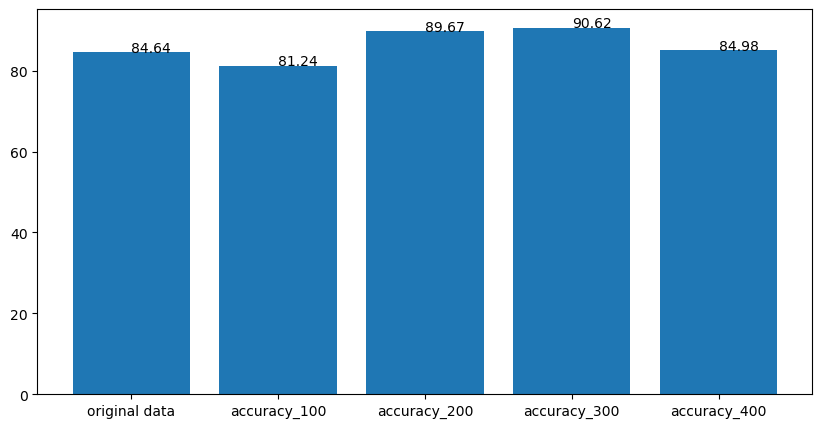

In [32]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

mutual_info_classif

Summary of Kbest

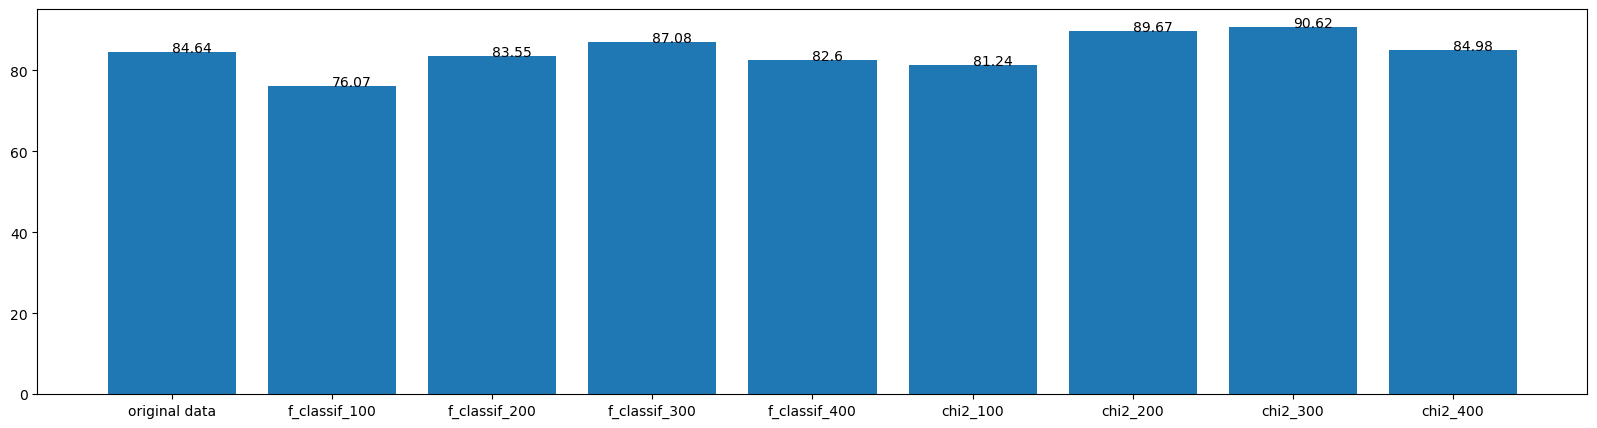

In [33]:
execution = ("original data", 'f_classif_100','f_classif_200',
             'f_classif_300','f_classif_400','chi2_100','chi2_200',
             'chi2_300','chi2_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2))]
fig = plt.figure(figsize = (20, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

In [34]:
from sklearn.feature_selection import SelectPercentile

In [35]:
feature_selection_SelectPercentile_25 = SelectPercentile(f_classif, percentile=25)
X_feature_selection_f_classif_25 = feature_selection_SelectPercentile_25.fit_transform(X, y)
X_feature_selection_f_classif_25.shape
X_train_f_classif_25, X_test_f_classif_25,y_train_f_classif_25, y_test_f_classif_25 = train_test_split(X_feature_selection_f_classif_25,y, test_size=0.2)
print(f"X_train_f_classif_25: {X_train_f_classif_25.shape}")
print(f"X_test_f_classif_25: {X_test_f_classif_25.shape}")
print(f"y_train_f_classif_25: {y_train_f_classif_25.shape}")
print(f"y_test_f_classif_25: {y_test_f_classif_25.shape}")
fitted_LR_f_classif_25 = LR_classifer.fit(X_train_f_classif_25, y_train_f_classif_25)
y_predicted_f_classif_25 = fitted_LR_f_classif_25.predict(X_test_f_classif_25)
accuracy_prediction_f_classif_25 = accuracy_score(y_test_f_classif_25, y_predicted_f_classif_25)
print(f"accuracy_f_classif_25: {accuracy_prediction_f_classif_25}")

X_train_f_classif_25: (5881, 141)
X_test_f_classif_25: (1471, 141)
y_train_f_classif_25: (5881,)
y_test_f_classif_25: (1471,)
accuracy_f_classif_25: 0.7804214819850442


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
feature_selection_SelectPercentile_50 = SelectPercentile(f_classif, percentile=50)
X_feature_selection_f_classif_50 = feature_selection_SelectPercentile_50.fit_transform(X, y)
X_feature_selection_f_classif_50.shape
X_train_f_classif_50, X_test_f_classif_50,y_train_f_classif_50, y_test_f_classif_50 = train_test_split(X_feature_selection_f_classif_50,y, test_size=0.2)
print(f"X_train_f_classif_50: {X_train_f_classif_50.shape}")
print(f"X_test_f_classif_50: {X_test_f_classif_50.shape}")
print(f"y_train_f_classif_50: {y_train_f_classif_50.shape}")
print(f"y_test_f_classif_50: {y_test_f_classif_50.shape}")
fitted_LR_f_classif_50 = LR_classifer.fit(X_train_f_classif_50, y_train_f_classif_50)
y_predicted_f_classif_50 = fitted_LR_f_classif_50.predict(X_test_f_classif_50)
accuracy_prediction_f_classif_50 = accuracy_score(y_test_f_classif_50, y_predicted_f_classif_50)
print(f"accuracy_f_classif_50: {accuracy_prediction_f_classif_50}")

X_train_f_classif_50: (5881, 281)
X_test_f_classif_50: (1471, 281)
y_train_f_classif_50: (5881,)
y_test_f_classif_50: (1471,)
accuracy_f_classif_50: 0.8742352141400408


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
feature_selection_SelectPercentile_75 = SelectPercentile(f_classif, percentile=75)
X_feature_selection_f_classif_75 = feature_selection_SelectPercentile_75.fit_transform(X, y)
X_feature_selection_f_classif_75.shape
X_train_f_classif_75, X_test_f_classif_75,y_train_f_classif_75, y_test_f_classif_75 = train_test_split(X_feature_selection_f_classif_75,y, test_size=0.2)
print(f"X_train_f_classif_75: {X_train_f_classif_75.shape}")
print(f"X_test_f_classif_75: {X_test_f_classif_75.shape}")
print(f"y_train_f_classif_75: {y_train_f_classif_75.shape}")
print(f"y_test_f_classif_75: {y_test_f_classif_75.shape}")
fitted_LR_f_classif_75 = LR_classifer.fit(X_train_f_classif_75, y_train_f_classif_75)
y_predicted_f_classif_75 = fitted_LR_f_classif_75.predict(X_test_f_classif_75)
accuracy_prediction_f_classif_75 = accuracy_score(y_test_f_classif_75, y_predicted_f_classif_75)
print(f"accuracy_f_classif_75: {accuracy_prediction_f_classif_75}")

X_train_f_classif_75: (5881, 421)
X_test_f_classif_75: (1471, 421)
y_train_f_classif_75: (5881,)
y_test_f_classif_75: (1471,)
accuracy_f_classif_75: 0.8647178789938818


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


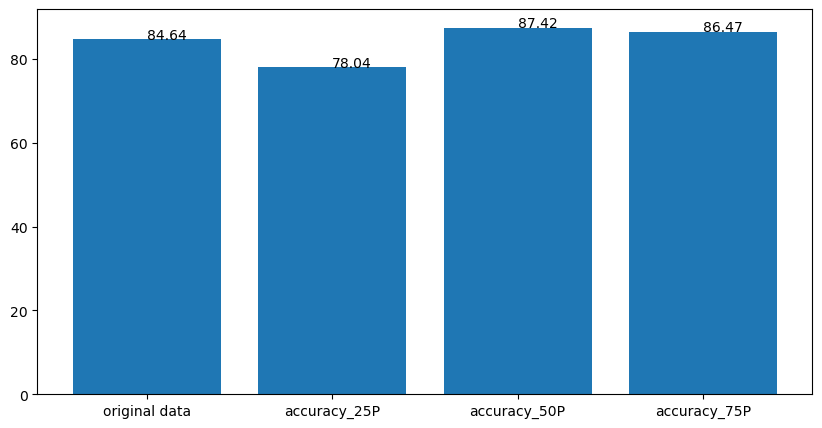

In [38]:
execution = ("original data", 'accuracy_25P','accuracy_50P',
             'accuracy_75P')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_25*100,2)), float(round(accuracy_prediction_f_classif_50*100,2)), 
            float(round(accuracy_prediction_f_classif_75*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

# PCA

In [39]:
from sklearn import decomposition


In [40]:
pca_100 = decomposition.PCA(n_components=100)
pca_100.fit(X)
X_pca_100 = pca_100.transform(X)

In [41]:
X_pca_100.shape

(7352, 100)

In [42]:
X_train_pca_100, X_test_pca_100,y_train_pca_100, y_test_pca_100 = train_test_split(X_pca_100,y, test_size=0.2)

In [43]:
print(f"X_train_pca_100: {X_train_pca_100.shape}")
print(f"X_test_pca_100: {X_test_pca_100.shape}")
print(f"y_train_pca_100: {y_train_pca_100.shape}")
print(f"y_test_pca_100: {y_test_pca_100.shape}")

X_train_pca_100: (5881, 100)
X_test_pca_100: (1471, 100)
y_train_pca_100: (5881,)
y_test_pca_100: (1471,)


In [44]:
fitted_LR_pca_100 = LR_classifer.fit(X_train_pca_100, y_train_pca_100)

/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
y_predicted_pca_100 = fitted_LR_pca_100.predict(X_test_pca_100)

In [46]:
accuracy_prediction_pca_100 = accuracy_score(y_test_pca_100, y_predicted_pca_100)
print(f"accuracy_pca_100: {accuracy_prediction_pca_100}")

accuracy_pca_100: 0.8966689326988443


In [47]:
pca_200 = decomposition.PCA(n_components=200)
pca_200.fit(X)
X_pca_200 = pca_200.transform(X)
X_train_pca_200, X_test_pca_200,y_train_pca_200, y_test_pca_200 = train_test_split(X_pca_200,y, test_size=0.2)
print(f"X_train_pca_200: {X_train_pca_200.shape}")
print(f"X_test_pca_200: {X_test_pca_200.shape}")
print(f"y_train_pca_200: {y_train_pca_200.shape}")
print(f"y_test_pca_200: {y_test_pca_200.shape}")
fitted_LR_pca_200 = LR_classifer.fit(X_train_pca_200, y_train_pca_200)
y_predicted_pca_200 = fitted_LR_pca_200.predict(X_test_pca_200)	
accuracy_prediction_pca_200 = accuracy_score(y_test_pca_200, y_predicted_pca_200)
print(f"accuracy_pca_200: {accuracy_prediction_pca_200}")

X_train_pca_200: (5881, 200)
X_test_pca_200: (1471, 200)
y_train_pca_200: (5881,)
y_test_pca_200: (1471,)
accuracy_pca_200: 0.9014276002719238


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
pca_300 = decomposition.PCA(n_components=300)
pca_300.fit(X)
X_pca_300 = pca_300.transform(X)
X_train_pca_300, X_test_pca_300,y_train_pca_300, y_test_pca_300 = train_test_split(X_pca_300,y, test_size=0.2)
print(f"X_train_pca_300: {X_train_pca_300.shape}")
print(f"X_test_pca_300: {X_test_pca_300.shape}")
print(f"y_train_pca_300: {y_train_pca_300.shape}")
print(f"y_test_pca_300: {y_test_pca_300.shape}")
fitted_LR_pca_300 = LR_classifer.fit(X_train_pca_300, y_train_pca_300)
y_predicted_pca_300 = fitted_LR_pca_300.predict(X_test_pca_300)	
accuracy_prediction_pca_300 = accuracy_score(y_test_pca_300, y_predicted_pca_300)
print(f"accuracy_pca_300: {accuracy_prediction_pca_300}")

X_train_pca_300: (5881, 300)
X_test_pca_300: (1471, 300)
y_train_pca_300: (5881,)
y_test_pca_300: (1471,)
accuracy_pca_300: 0.8905506458191706


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
pca_400 = decomposition.PCA(n_components=400)
pca_400.fit(X)
X_pca_400 = pca_400.transform(X)
X_train_pca_400, X_test_pca_400,y_train_pca_400, y_test_pca_400 = train_test_split(X_pca_400,y, test_size=0.2)
print(f"X_train_pca_400: {X_train_pca_400.shape}")
print(f"X_test_pca_400: {X_test_pca_400.shape}")
print(f"y_train_pca_400: {y_train_pca_400.shape}")
print(f"y_test_pca_400: {y_test_pca_400.shape}")
fitted_LR_pca_400 = LR_classifer.fit(X_train_pca_400, y_train_pca_400)
y_predicted_pca_400 = fitted_LR_pca_400.predict(X_test_pca_400)	
accuracy_prediction_pca_400 = accuracy_score(y_test_pca_400, y_predicted_pca_400)
print(f"accuracy_pca_400: {accuracy_prediction_pca_400}")

X_train_pca_400: (5881, 400)
X_test_pca_400: (1471, 400)
y_train_pca_400: (5881,)
y_test_pca_400: (1471,)
accuracy_pca_400: 0.8789938817131203


/home/parham/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


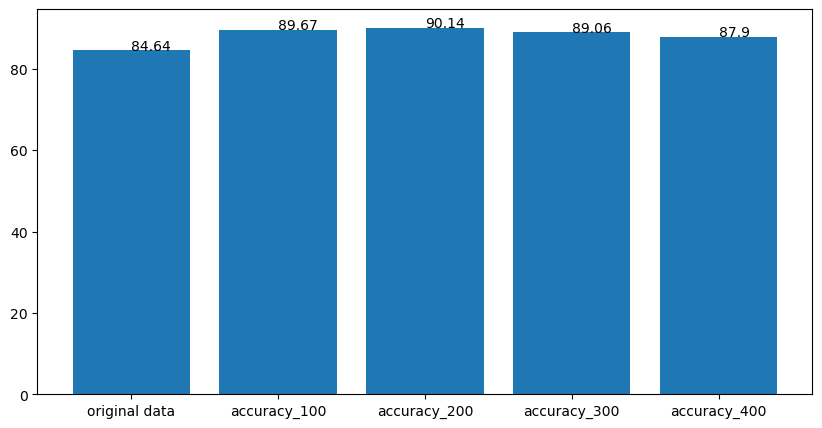

In [50]:
execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_pca_100*100,2)), float(round(accuracy_prediction_pca_200*100,2)), 
            float(round(accuracy_prediction_pca_300*100,2)), float(round(accuracy_prediction_pca_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()